In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

import numpy as np
import torch

import gzip
import os
import pickle

import importlib
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
ls ../../price_model


README.md  functions/ images/


In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
os.chdir('../../price_model/')

# These are my personally tailored stop words that include foreign articles such as 'la', 'el', 'les', 'il'
from functions.featurization import stop_words

# About 150 typical English stopwords
nltk_words = list(stopwords.words('english'))
# Remove negative words from stop word list.  In other words, I want to keep them in the text.
# I believe those words are important in conveying negative sentiments.
nltk_words = [word for word in nltk_words if 'not' not in word and word[-3:] != "n't" and word[-2:] != "n'"][:141]

# Add the nltk words to my original stop word list
stop_words.extend(nltk_words)


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [4]:
print(stop_words)

['&', 'la', 'le', 'les', 'the', 'da', 'dal', 'dalla', 'della', 'del', 'de', 'al', 'alla', 'gli', 'i', 'dos', 'das', 'di', 'du', 'do', 'lo', 'of', 'and', 'with', 'to', 'the', 'a', 'an', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 

In [5]:
print([word for word in stop_words if 'not' not in word and word[-3:] != "n't" and word[-2:] != "n'"])

['&', 'la', 'le', 'les', 'the', 'da', 'dal', 'dalla', 'della', 'del', 'de', 'al', 'alla', 'gli', 'i', 'dos', 'das', 'di', 'du', 'do', 'lo', 'of', 'and', 'with', 'to', 'the', 'a', 'an', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 

In [6]:
stop_words.remove('nor')
stop_words.remove('no')
stop_words.remove('don')
stop_words.remove('t')

In [7]:
print(sorted(stop_words))

['&', 'a', 'a', 'about', 'above', 'after', 'again', 'against', 'al', 'all', 'alla', 'am', 'an', 'an', 'and', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'd', 'da', 'dal', 'dalla', 'das', 'de', 'del', 'della', 'di', 'did', 'do', 'do', 'does', 'doing', 'dos', 'down', 'du', 'during', 'each', 'few', 'for', 'from', 'further', 'gli', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'i', 'if', 'in', 'into', 'is', 'it', "it's", 'its', 'itself', 'just', 'la', 'le', 'les', 'll', 'lo', 'm', 'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'she', "she's", 'should', "should've", 'so', 'some', 'such', 'than', 'that', "that'll", 'the', 'the', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those'

In [8]:
from sentence_transformers import SentenceTransformer 


/Users/willtong/Library/Caches/pypoetry/virtualenvs/wine-libraries-PLl6gzSz-py3.12/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [10]:
df = pd.read_json("../data/deduped_mod_winemag-data-130k-v2.json")
df.shape

(111593, 15)

In [11]:
info_features = df.columns
info_features = ['title',  'designation', 'variety', 'region-1',
       'region-2', 'province', 'country', 'winery']
df.fillna(" ", inplace = True)
# df["merged_info_text"] = df[info_features].apply(lambda info_features: ' '.join(list(set(info_features))), axis = 1)
# df["merged_info_text"] = df["merged_info_text"].apply(lambda merged_info_text: " ".join(list(set(merged_info_text.split(" ")))))
df["merged_info_text"] = df[['description', "merged_info_text"]].apply(lambda info_features: ' '.join(list(info_features)), axis = 1)
df["merged_info_text"] = df["merged_info_text"].apply(lambda text: " ".join([w for w in text.split() if not w in stop_words]))
df["len"] = df["merged_info_text"].apply(len)


df.drop(info_features, axis = 1, inplace = True)
# df["merged_info_features"] = df[info_features].apply(lambda info_features: info_features)

In [12]:
df

,points,description,taster-name,taster-twitter-handle,price,merged_info_text,len
1,87,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Roger Voss,@vossroger,15,"This ripe fruity, wine smooth still structured. Firm tannins filled juicy red berry fruits freshened acidity. It's already drinkable, although certainly better 2016. This ripe fruity, wine smooth still structured. Firm tannins filled juicy red berry fruits freshened acidity. It's already drinkable, although certainly better 2016. Quinta Douro (Douro) Portugal Red 2011 Avidagos Portuguese",390
2,87,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",Paul Gregutt,@paulgwine,14,"Tart snappy, flavors lime flesh rind dominate. Some green pineapple pokes through, crisp acidity underscoring flavors. The wine stainless-steel fermented. Tart snappy, flavors lime flesh rind dominate. Some green pineapple pokes through, crisp acidity underscoring flavors. The wine stainless-steel fermented. Pinot (Willamette Valley 2013 US Rainstorm Gris Oregon Willamette Valley)",383
3,87,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Alexander Peartree,,13,"Pineapple rind, lemon pith orange blossom start aromas. The palate bit opulent, notes honey-drizzled guava mango giving way slightly astringent, semidry finish. Pineapple rind, lemon pith orange blossom start aromas. The palate bit opulent, notes honey-drizzled guava mango giving way slightly astringent, semidry finish. Shore) St. Shore 2013 Riesling US Lake Harvest Late Michigan Reserve (Lake Julian",403
4,87,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Paul Gregutt,@paulgwine,65,"Much like regular bottling 2012, comes across rather rough tannic, rustic, earthy, herbal characteristics. Nonetheless, think pleasantly unfussy country wine, good companion hearty winter stew. Much like regular bottling 2012, comes across rather rough tannic, rustic, earthy, herbal characteristics. Nonetheless, think pleasantly unfussy country wine, good companion hearty winter stew. Pinot 2012 (Willamette Block Vintner's Valley Sweet Cheeks Willamette US Noir Oregon Child Reserve Wild Valley)",499
5,87,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Michael Schachner,@wineschach,15,"Blackberry raspberry aromas show typical Navarran whiff green herbs and, case, horseradish. In mouth, fairly full bodied, tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, finish fresh grabby. Blackberry raspberry aromas show typical Navarran whiff green herbs and, case, horseradish. In mouth, fairly full bodied, tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, finish fresh grabby. (Navarra) 2011 Tandem Northern Spain Ars Tempranillo-Merlot Vitro In Navarra",498
...,...,...,...,...,...,...,...
129966,90,"Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",Anna Lee C. Iijima,,28,"Notes honeysuckle cantaloupe sweeten deliciously feather-light spätlese. It's intensely juicy, quenching palate streams

In [13]:
# The removes the ceiling for memory usage for application on my laptop.  
# It would run out of money if I don't remove it.
# Exercise extreme caution.   
os.environ['PYTORCH_MPS_HIGH_WATERMARK_RATIO'] = '-0.0'

In [14]:
# This is the sentence transformer that can take the longest text (512 words).   
# Our description can be as long as > 900 words (about 100 or so).  
# Wheir embeddings will not be perfect, still well over half their words are captured.
# It is the best we can do.
model_names = ['msmarco-distilbert-dot-v5']
trust_remote_code = False

for model_name in model_names:
    model = SentenceTransformer(model_name, trust_remote_code = trust_remote_code)
    df["desc_embed"] = df["merged_info_text"].apply(lambda text: model.encode(text, convert_to_tensor=True))
    desc_embeds = model.encode(df["merged_info_text"].values, convert_to_tensor=False)
    df_embeds = pd.DataFrame(columns = ['embed_'+ str(num).zfill(3) for num in range(desc_embeds.shape[1])],
                             data = desc_embeds,
                             index = df.index
                            )

In [17]:
with gzip.open("../data/embedded_desc_nostopwords"+model_name.split("/")[-1]+".pckl", "wb") as f:
    pickle.dump(df_embeds, f)

In [ ]:
How trained model can be useful
1. Sentimental analysis
2. word matching.  Added regional, title, dominational info to match.

In [29]:
model_name = 'msmarco-distilbert-dot-v5'
model_path = "wine_libraries/data/embedded_desc"+model_name.split("/")[-1]+".pckl"
with gzip.open(model_path, "rb") as f:
    df_embeds = pickle.load(f)

In [155]:


df_merged = apply_cosine_similarity(df, df_embeds, wine_of_interest_index)

48577
merged_info_text    Hard oak nose creates pinched, chemical sensation. Give time goes away, leaving minerally apple peach aromas. In mouth, firm intense, peppery flavors, Sherry notes almondy accents. A bitter finish nut skins dryness registers complex. Montsalvat Blanc Francesc Sanchez Blend 2009 Bas Spain (Priorat) White Priorat Catalonia
price                                                                                                                                                                                                                                                                                                                                               40
taster-name                                                                                                                                                                                                                                                                                                         

In [27]:

wine_of_interest_index = np.random.randint(df.shape[0])

df_merged = apply_cosine_similarity(df, df_embeds, wine_of_interest_index)
# print(df_merged.iloc[wine_of_interest_index,:])


NameError: name 'apply_cosine_similarity' is not defined

In [128]:
# Bad wine
#116245	Briny citrus, feline notes pithy scents send Merseguera-led blend toward pulpy, citrusy palate. Grapefruit pithy, lightly bitter flavors finish citric, little change wine's primary flavors. Volver Blanco (Alicante) 2014 Tarima Blend Levante Alicante Spain White

In [156]:
df_merged[["merged_info_text", "price", "taster-name", "points", "cos_sim",
          ]].sort_values("cos_sim", ascending = False).head(40)

,merged_info_text,price,taster-name,points,cos_sim
53932,"Hard oak nose creates pinched, chemical sensation. Give time goes away, leaving minerally apple peach aromas. In mouth, firm intense, peppery flavors, Sherry notes almondy accents. A bitter finish nut skins dryness registers complex. Montsalvat Blanc Francesc Sanchez Blend 2009 Bas Spain (Priorat) White Priorat Catalonia",40,Michael Schachner,88,1.000000
34975,"Expensive get. The nose weird mix salami sweetness, palate syrupy, globular blend cloying oak, caramel syrup candied banana. Way much wood vanilla here, nearly enough balance purity. Montsalvat Blanc Francesc Sanchez Blend 2008 Bas Spain (Priorat) White Priorat Catalonia",40,Michael Schachner,82,0.878263
97994,"Gritty leather cherry aromas pass quickly across nose wine. It's chunky meaty, plum, berry herbal flavors. A grippy, straightforward finish confirms well made limits. 2014 Tressals Red Blend Spain (Priorat) Priorat Catalonia",19,Michael Schachner,86,0.865103
16817,"Mineral-driven hard nose, features toasty, smoky, chocolaty notes addition medicinal berry aromas. It feels juicy also resiny creamy, plum wood flavors finish long. This ripe, fruity wine plenty oak, size body. (Montsant) Velles Nobles Montsant Vinyes Red Blend Catalonia Spain Acústic Garnatxa-Carinyena 2010",20,Michael Schachner,88,0.857454
48920,"Baked apple, pulpy citrus oak aromas create soft nose. In mouth, feels wide resiny, flavors match lead: oak, resin, vanilla, tropical fruit citrus registering. On finish, oaky resiny. Valley Casablanca Chile 2011 Alpha Montes (Casablanca Valley) Chardonnay",25,Michael Schachner,87,0.850721
42116,"A fruitless nose smells mealy grape skins, spoiled apple peach pit. Unfocused white-fruit flavors mealy funky finish. 2016 Blend Spain Terroir (Priorat) Límit Al White Priorat Catalonia",30,Michael Schachner,82,0.848792
100312,"Despite tan-meets-orange color, Priorat white fresh nose apricot aromas. A solid texture grip controls palate, dry white-fruit orange-peel flavors end slightly rubbery white-grape tannins. Guix (Priorat) 2014 Blend Spain Terroir Pedra Límit Al White Priorat Catalonia",90,Michael Schachner,91,0.846533
104025,"Although aromatic, nose wine easygoing, mild peach apple aromas. It feels fresh medium bodied, apple, peach melony flavors, latter perhaps due blend's 14% white Carmenère. It shows mellow oak notes latent acidity finish. (Central Valley Central Chile Chardonnay 2011 Valley) oops",10,Michael Schachner,86,0.844168
67631,"The nose brut touch grassy, apple aromas. On first take, feels foamy, time settles down. Flavors sulfur, apple saline finish pithy citrus notes flavors spiced apple, rhubarb mild bitterness. Mont Brut Extremarium NV Cava Reserva Blend Sparkling Spain Marçal (Cava) Catalonia",27,Michael Schachner,87,0.843035
102888,"This nice value-priced Albariño, minerally nose also offers aromas melon, apple peach. The palate citrusy feel, lemony acids. Citrus stone-fruit flavors finish stony crisp, final blast lemon. Viña Rías Albariño (Rías 2013 Baixas Baixas) Galicia Spain Cartín",14,Michael Schachner,89,0.842849


In [129]:
df_merged[["merged_info_text", "price", "taster-name", "points", "cos_sim",
          ]].sort_values("cos_sim", ascending = False).head(40)

,merged_info_text,price,taster-name,points,cos_sim
53932,"Hard oak nose creates pinched, chemical sensation. Give time goes away, leaving minerally apple peach aromas. In mouth, firm intense, peppery flavors, Sherry notes almondy accents. A bitter finish nut skins dryness registers complex. Montsalvat Blanc Francesc Sanchez Blend 2009 Bas Spain (Priorat) White Priorat Catalonia",40,Michael Schachner,88,1.000000
34975,"Expensive get. The nose weird mix salami sweetness, palate syrupy, globular blend cloying oak, caramel syrup candied banana. Way much wood vanilla here, nearly enough balance purity. Montsalvat Blanc Francesc Sanchez Blend 2008 Bas Spain (Priorat) White Priorat Catalonia",40,Michael Schachner,82,0.878263
97994,"Gritty leather cherry aromas pass quickly across nose wine. It's chunky meaty, plum, berry herbal flavors. A grippy, straightforward finish confirms well made limits. 2014 Tressals Red Blend Spain (Priorat) Priorat Catalonia",19,Michael Schachner,86,0.865103
16817,"Mineral-driven hard nose, features toasty, smoky, chocolaty notes addition medicinal berry aromas. It feels juicy also resiny creamy, plum wood flavors finish long. This ripe, fruity wine plenty oak, size body. (Montsant) Velles Nobles Montsant Vinyes Red Blend Catalonia Spain Acústic Garnatxa-Carinyena 2010",20,Michael Schachner,88,0.857454
48920,"Baked apple, pulpy citrus oak aromas create soft nose. In mouth, feels wide resiny, flavors match lead: oak, resin, vanilla, tropical fruit citrus registering. On finish, oaky resiny. Valley Casablanca Chile 2011 Alpha Montes (Casablanca Valley) Chardonnay",25,Michael Schachner,87,0.850721
42116,"A fruitless nose smells mealy grape skins, spoiled apple peach pit. Unfocused white-fruit flavors mealy funky finish. 2016 Blend Spain Terroir (Priorat) Límit Al White Priorat Catalonia",30,Michael Schachner,82,0.848792
100312,"Despite tan-meets-orange color, Priorat white fresh nose apricot aromas. A solid texture grip controls palate, dry white-fruit orange-peel flavors end slightly rubbery white-grape tannins. Guix (Priorat) 2014 Blend Spain Terroir Pedra Límit Al White Priorat Catalonia",90,Michael Schachner,91,0.846533
104025,"Although aromatic, nose wine easygoing, mild peach apple aromas. It feels fresh medium bodied, apple, peach melony flavors, latter perhaps due blend's 14% white Carmenère. It shows mellow oak notes latent acidity finish. (Central Valley Central Chile Chardonnay 2011 Valley) oops",10,Michael Schachner,86,0.844168
67631,"The nose brut touch grassy, apple aromas. On first take, feels foamy, time settles down. Flavors sulfur, apple saline finish pithy citrus notes flavors spiced apple, rhubarb mild bitterness. Mont Brut Extremarium NV Cava Reserva Blend Sparkling Spain Marçal (Cava) Catalonia",27,Michael Schachner,87,0.843035
102888,"This nice value-priced Albariño, minerally nose also offers aromas melon, apple peach. The palate citrusy feel, lemony acids. Citrus stone-fruit flavors finish stony crisp, final blast lemon. Viña Rías Albariño (Rías 2013 Baixas Baixas) Galicia Spain Cartín",14,Michael Schachner,89,0.842849


In [130]:
df_merged[["merged_info_text", "price", "taster-name", "points", "cos_sim",
          ]].sort_values("cos_sim", ascending = False).tail(40)

,merged_info_text,price,taster-name,points,cos_sim
113381,This Merlot muted aromatically. On palate gigantic tannins—big bold sure. California (Clarksburg) Valley Clarksburg Central US 2008 Merlot Reserve LangeTwins,30,Virginie Boone,82,0.632304
100101,"A refreshing rosé sparkler would pair smoked salmon fried calamari rings, tonic bright, offering crisp acidity tonic effervescence. Veneto Italy NV Blend Sparkling (Veneto) Rosé Lamberti",15,,85,0.632099
115069,"This 100% varietal wine comes Conner Lee, Sagemoor Klipsun vineyards. Already six years old, near full-bloom aromas dates, blackberry pie, dried herbs spice. The black fruit flavors full bodied dense. Drink up. Valley (WA) Cabernet (Columbia (WA)) Washington US 2009 Columbia Sauvignon Syzygy",39,Sean P. Sullivan,91,0.632053
100104,"Sourced Sundance Vineyard, soft oaky Chardonnay, round, buttery finish. Best enjoyed next year two. Page Valley (WA) Cellars (Columbia Autumn (WA)) US Chase Chardonnay Columbia Washington 2010",19,Paul Gregutt,85,0.631918
76398,"Coming winery's SJR Vineyard The Rocks District, blockbuster wine displays savory aromas green olive, sea breeze, smoked meat, peat earth along coffee plum. The palate shows great concentration richness also deftness, delineation precision. It's complete head turner shows true sense place. Syrah (OR) 2012 (OR)) Valley Other (Walla US Walla Delmas Oregon",65,Sean P. Sullivan,94,0.631577
2100,"Former Wild Horse proprietor Ken Volk back personal brand selling winery. He's sourced fruit famous old vineyard. It's good start, deep golden wine showing ripe apricot, pear sweet smoky oak flavors. Volk California Valley Central (Santa Vineyard US Chardonnay 2005 Maria Kenneth Madre Coast Sierra Valley) Santa",24,,87,0.631518
116374,"Much higher production Noceto's Riserva sourced broadly, Sangiovese rustic earthy, cranberry flavors bursting seams, would yummy thin-crust pizza. Amador California Sangiovese County US 2009 (Amador Foothills Sierra County) Noceto",18,Virginie Boone,85,0.631109
115547,"Ripe peppery, exuberant Zin made wash beef fajitas tacos cheddar cheese-covered hamburger. It floods mouth blackberry, cherry currant flavors, wrapped thick, sturdy tannins. Terra Amador California Zinfandel d'Oro County 2006 US Blend (Amador Foothills Sierra County) SHR Field",29,,88,0.630555
72317,"Like familiar aged tawny counterparts, aged white Ports take color age. This 10-year-old pale gold glass. While fruitiness remains, beginning show woody, spicy character. Like aged Ports, ready drink now. Port Kopke NV Portugal Old 10 (Port) White Years",39,Roger Voss,92,0.630304
129414,"A bit austere Kilikanoon's cuveés, Mort's Block long haul. Still baby, currently shows lemon-lime characters, kerosene Barbie doll plastic. The palate linear supercitrusy. Drink 2018–2025. Mort's Block Valley 2016 South (Clare Riesling Clare Kilikanoon Australia Valley)",20,,89,0.629117


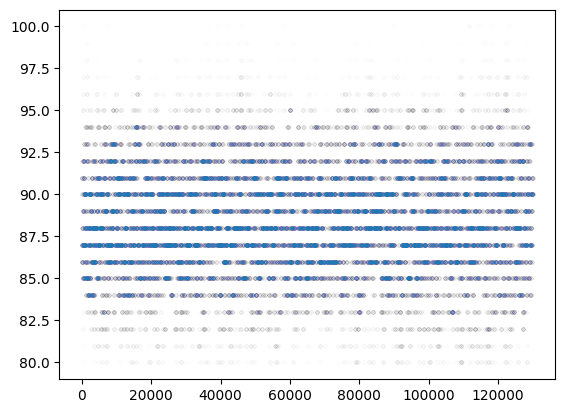

In [122]:
plt.plot(df_merged["points"], marker = '.', lw = 0, alpha = 0.003)

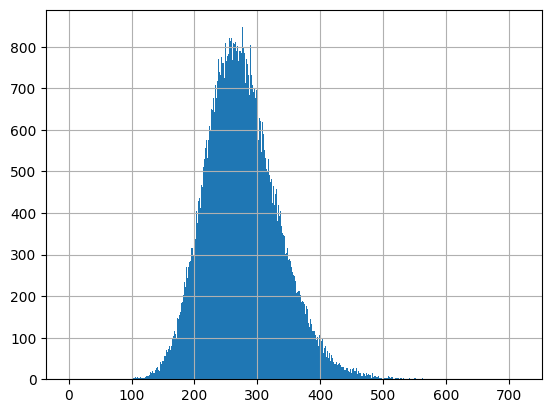

In [14]:
plt.hist(df["len"], 
         bins = range(0, df["len"].max()))
plt.grid()
plt.show()

In [15]:
df["merged_info_text"] 

1                                                                                          This ripe fruity, wine smooth still structured. Firm tannins filled juicy red berry fruits freshened acidity. It's already drinkable, although certainly better 2016. Portugal Portuguese 2011 Avidagos Red Quinta Douro (Douro)
2                                                                                      Tart snappy, flavors lime flesh rind dominate. Some green pineapple pokes through, crisp acidity underscoring flavors. The wine stainless-steel fermented. Oregon Valley US Pinot Rainstorm Willamette Valley) 2013 (Willamette Gris
3                                                                        Pineapple rind, lemon pith orange blossom start aromas. The palate bit opulent, notes honey-drizzled guava mango giving way slightly astringent, semidry finish. (Lake Julian Riesling US St. Michigan Reserve Shore) Harvest Shore 2013 Lake Late
4         Much like regular bottling 2012, comes acr